## A Minimal Case: Backtesting a Factor Selection Strategy

In [1]:
from frozen.engine import FrozenBt
from frozen.factor import *
from frozen.utils import Universe

class FactorFactory(FrozenBt):
    def __init__(self):
        super().__init__(__vsc_ipynb_file__)

    def univ(self):
        universe = Universe(self.config)
        self.universe = universe.pool

    def prepare_data(self):
        data_definitions = [
            ("stock_daily_hfq", ("close", "pct_chg"), ("close", "returns")),
        ]
        return self.dataloader.load_batch(data_definitions, self.universe, start_date=self.start_date_lookback, end_date=self.end_date)

    def calc(self):
        string = "cs_rank(ts_argmax(SignedPower(where(returns < 0 ? ts_stddev(returns, 5) : close), 2.0), 5))"
        alpha = calc_str(string, self.prepare_data())
        return alpha

c:\Users\zhaoxs3\AppData\Local\miniforge3\envs\frozen\Lib\site-packages\tqdm_joblib\__init__.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


🧊 Initializing FROZEN Backtest Framework...
✅ Successfully connected to database    🔗 Done!                                


Performing Backtest: 100%|██████████| 235/235 [00:03<00:00, 75.23it/s]


🔔 Warnings: Not consistent with date_rule for the last holding period.
+-----------+-------------+---------------+--------+---------+----------+-----------+---------+------------+----------------+
|   Account |   Benchmark |   Annual Rate |   Beta |   Alpha |   Sharpe |   Sortino |      IR |   Win Rate |   Max Drawdown |
+===========+=============+===============+========+=========+==========+===========+=========+============+================+
|    0.7108 |      0.8625 |       -0.0765 | 0.7785 | -0.0501 |  -0.2414 |   -0.3431 | -0.0133 |     0.4342 |         0.5726 |
+-----------+-------------+---------------+--------+---------+----------+-----------+---------+------------+----------------+


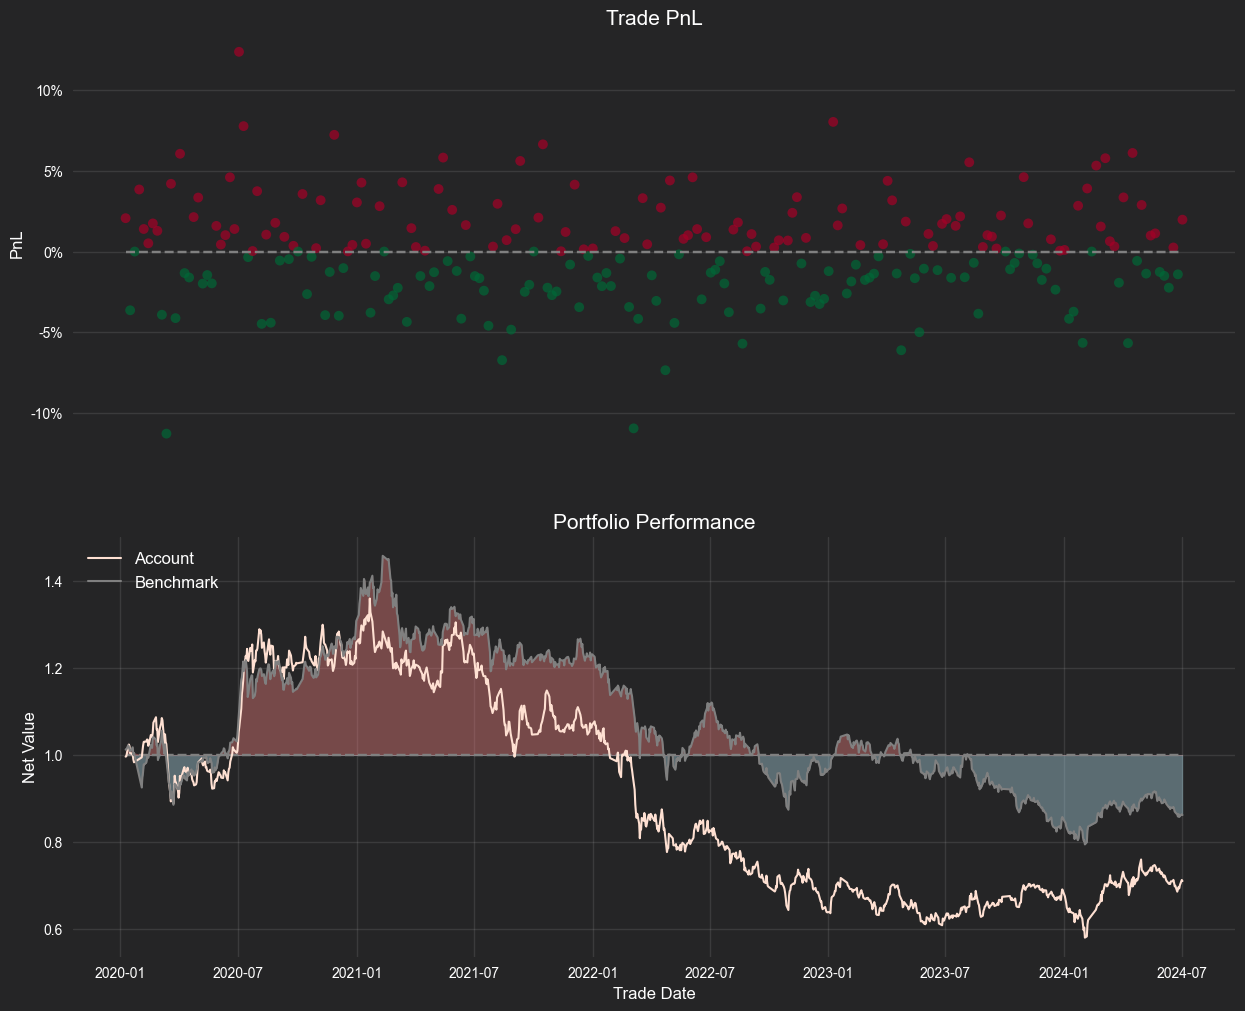

🎉 Execution complete!


,Account,Benchmark
2020-01-09,-0.003560,0.012658
2020-01-10,0.000704,-0.000285
2020-01-13,0.021307,0.009801
2020-01-14,0.005746,-0.003354
2020-01-15,-0.003498,-0.005526
...,...,...
2024-06-26,0.007716,0.006467
2024-06-27,-0.004575,-0.007513
2024-06-28,0.010426,0.002183
2024-07-01,0.017417,0.004774


In [2]:
strategy = FactorFactory()
strategy.run_backtest(plot=True, plot_type="all")